# Titanic - data setup

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [65]:
# Read in the dataset - data sourced from https://www.kaggle.com/datasets/vinicius150987/titanic3
titanic_df = pd.read_excel('data_files/titanic3.xls')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [66]:
# Review the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


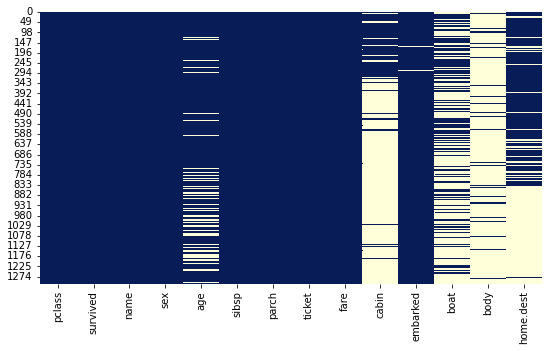

In [67]:
# Looking at amount of missing data
print(titanic_df.isna().sum())
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(titanic_df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

# Exploring the data

In [68]:
# Creating a copy of the dataframe
graph_df = titanic_df.copy()

In [69]:
# Defining colour palette for graphs
palette = 'YlGnBu'

### Who was onboard?

<h7> Passengers by sex

Text(0.5, 1.0, 'Sex by survival')

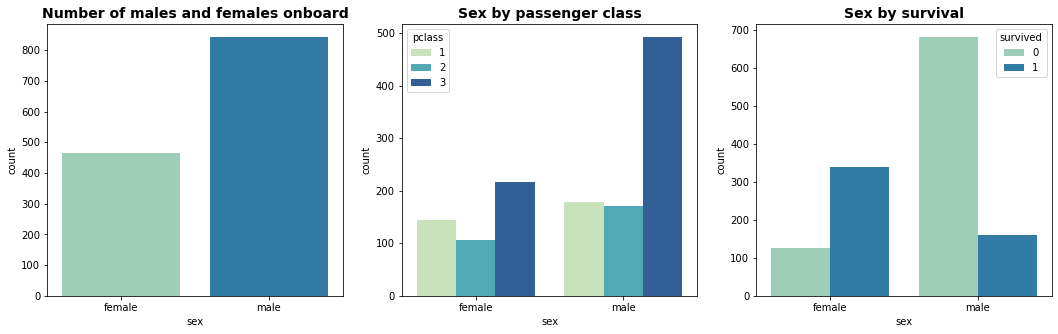

In [70]:
# Charting sex data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], data=graph_df, x='sex', palette=palette).set_title("Number of males and females onboard", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1], data=graph_df, x='sex', hue='pclass',  palette=palette).set_title("Sex by passenger class", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2], data=graph_df, x='sex', hue='survived',  palette=palette).set_title("Sex by survival", fontsize=14, fontweight='bold')

<h7> Age of passengers

Text(0.5, 1.0, 'Age by survival')

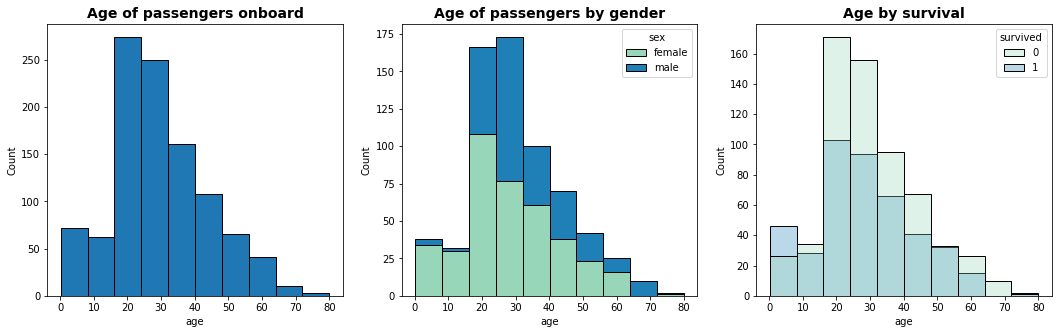

In [71]:
# Charting age of passengers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(ax=axes[0], data=graph_df, x='age', bins=10, alpha=1).set_title("Age of passengers onboard", fontsize=14, fontweight='bold')
sns.histplot(ax=axes[1], data=graph_df, x='age', hue='sex',  palette=palette, bins=10, alpha=1).set_title("Age of passengers by gender", fontsize=14, fontweight='bold')
sns.histplot(ax=axes[2], data=graph_df, x='age', hue='survived',  palette=palette, bins=10, alpha=0.3).set_title("Age by survival", fontsize=14, fontweight='bold')

<h7> Passenger class

In [72]:
# Creating a function to recode pcalss with complete name
def pclass_name(pclass):
    if pclass == 1:
        return "First class"
    elif pclass == 2:
        return "Second class"
    elif pclass == 3:
        return "Third class"
    else:
        return pclass

In [125]:
# Calling the function
graph_df['pclass'] = graph_df['pclass'].apply(pclass_name)
graph_df['pclass'].value_counts(dropna=False)

Third class     709
First class     323
Second class    277
Name: pclass, dtype: int64

Text(0.5, 1.0, 'Passenger class by survival')

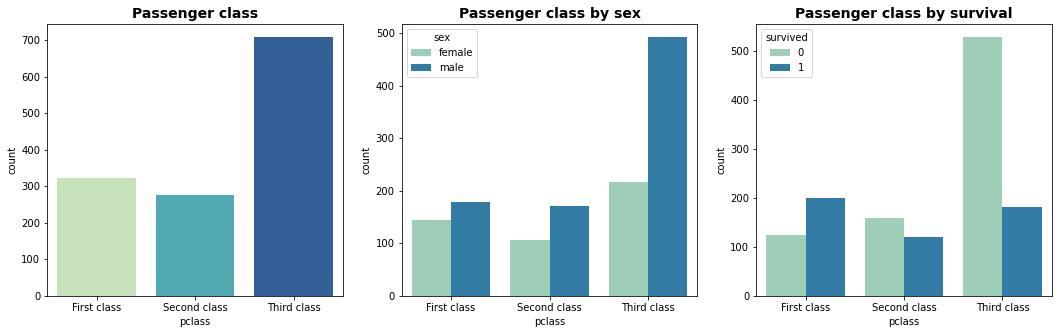

In [74]:
# Charting passenger class data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], data=graph_df, x='pclass', palette=palette).set_title("Passenger class", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1], data=graph_df, x='pclass', hue='sex',  palette=palette).set_title("Passenger class by sex", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2], data=graph_df, x='pclass', hue='survived',  palette=palette).set_title("Passenger class by survival", fontsize=14, fontweight='bold')

<h7> Looking at whether passengers were travelling alone or with family

In [75]:
# Creating a new column that sums together the number of family members they were travelling with
graph_df['family_members'] = graph_df['sibsp'] + graph_df['parch']

In [76]:
# Creating a fucntion to recode whether they were travelling with family
def family_members(count):
    if count > 0:
        return 'with family'
    elif count == 0:
        return 'alone'
    else:
        return count

In [77]:
# Calling the family_members function
graph_df['with_family'] = graph_df['family_members'].apply(family_members)

Text(0.5, 1.0, 'Travel companions by sex')

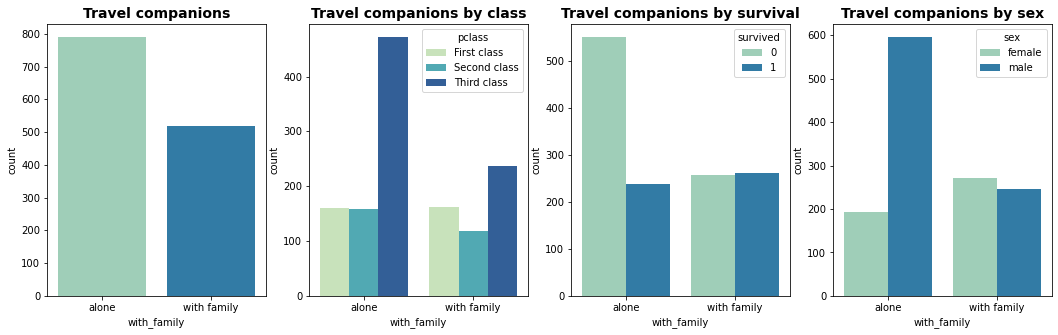

In [78]:
# Charting travel companion data
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
sns.countplot(ax=axes[0], data=graph_df, x='with_family', palette=palette).set_title("Travel companions", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1], data=graph_df, x='with_family', hue='pclass',  palette=palette).set_title("Travel companions by class", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2], data=graph_df, x='with_family', hue='survived',  palette=palette).set_title("Travel companions by survival", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[3], data=graph_df, x='with_family', hue='sex',  palette=palette).set_title("Travel companions by sex", fontsize=14, fontweight='bold')

<h7> Looking at passenger class and port of embarkment

In [79]:
# Creating a function to recode embarkment points with full names
def embarked_name(embarked):
    if embarked == 'S':
        return "Southampton (UK)"
    elif embarked == 'C':
        return "Cherbourg (FR)"
    elif embarked == 'Q':
        return "Queenstown (IE)"
    else:
        return embarked

In [126]:
# Recoding embarked field
graph_df['embarked'] = graph_df['embarked'].apply(embarked_name)
graph_df['embarked'].value_counts(dropna=False)


Southampton (UK)    914
Cherbourg (FR)      270
Queenstown (IE)     123
NaN                   2
Name: embarked, dtype: int64

Text(0.5, 1.0, 'Point of embarkment by survival')

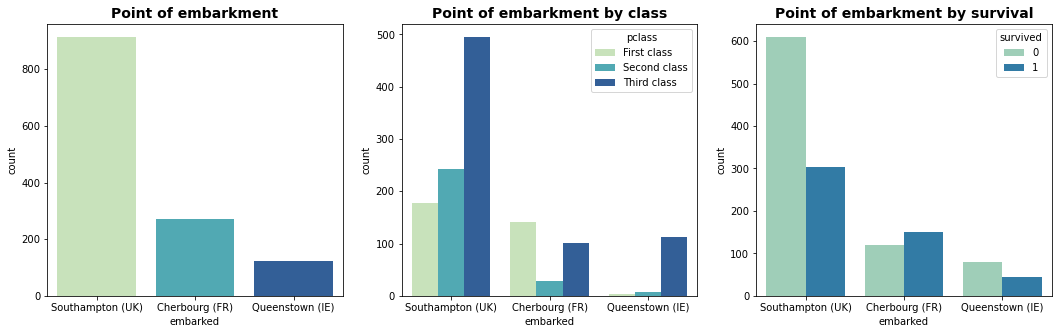

In [81]:
# Charting point of embarkment data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], data=graph_df, x='embarked', palette=palette).set_title("Point of embarkment", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1], data=graph_df, x='embarked', hue='pclass',  palette=palette).set_title("Point of embarkment by class", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2], data=graph_df, x='embarked', hue='survived',  palette=palette).set_title("Point of embarkment by survival", fontsize=14, fontweight='bold')

<h7> Looking at title and surival

In [82]:
# Extracting titles from passenger name and assigning them to a new column
name_split = graph_df['name'].str.split(',', expand=True)[1] # splitting name in two based on the ',' and taking the second column which contains the title
title = name_split.str.split('.', expand=True)[0] # splitting name in two based on the full stop and taking the first column that contains only the title
title = title.str.strip() # removing the additional space at the start of the title
graph_df['title'] = title # adding title as a new column in the data frame

In [83]:
graph_df['title'].value_counts(dropna=False)

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Sir               1
Jonkheer          1
Capt              1
Mme               1
Dona              1
Don               1
Lady              1
the Countess      1
Name: title, dtype: int64

In [84]:
# Creating a function to classify the titles into different groups
def title_grouped(title):
        if title == 'Miss' or title == 'Mlle' or title == 'Ms':
            return "Miss"
        elif title == 'Mrs' or title =='Mme':
            return "Mrs"
        elif title == "Mr" or title == 'Rev':
            return "Mr"
        elif title == "Master":
            return "male_child"
        elif title == "Col" or title == "Major" or title == "Capt" or title == 'Dr':
            return "Professional"
        elif title == "Don" or title == "Jonkheer" or title == "Sir":
            return "Noblility"
        elif title == "the Countess" or title == "Lady" or title == "Dona":
            return "Noblility"
        else:
            return title

In [85]:
# Calling that function and assigning results to new column in dataframe
graph_df['title_grouped'] = graph_df['title'].apply(title_grouped)
graph_df['title_grouped'].value_counts(dropna=False)

Mr              765
Miss            264
Mrs             198
male_child       61
Professional     15
Noblility         6
Name: title_grouped, dtype: int64

Text(0.5, 1.0, 'Passenger titles by survival')

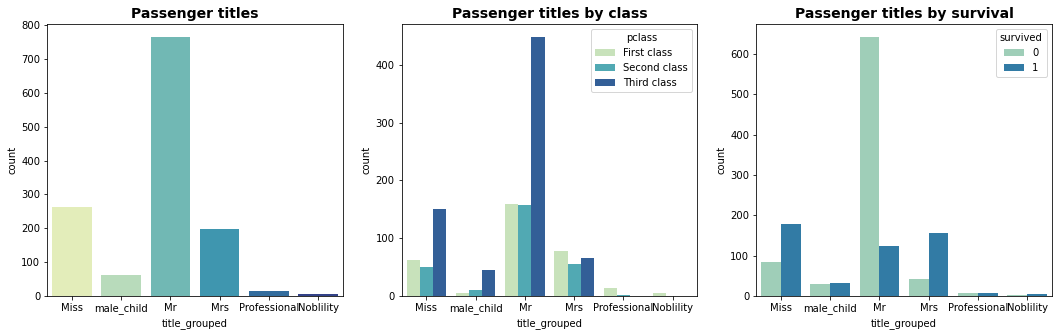

In [86]:
# Charting point of embarkment data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], data=graph_df, x='title_grouped', palette=palette).set_title("Passenger titles", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1], data=graph_df, x='title_grouped', hue='pclass',  palette=palette).set_title("Passenger titles by class", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2], data=graph_df, x='title_grouped', hue='survived',  palette=palette).set_title("Passenger titles by survival", fontsize=14, fontweight='bold')

<h7> Whether adult or child

In [87]:
# Defining if adult or child
def male_female_child(passenger):
    age, sex = passenger

    if age < 16:
        return 'child'
    else:
        return sex

In [88]:
# Applying the function
graph_df['person'] = graph_df[['age', 'sex']].apply(male_female_child, axis=1)
graph_df['person'].value_counts(dropna=False)

male      784
female    410
child     115
Name: person, dtype: int64

Text(0.5, 1.0, 'Passenger composition by survival')

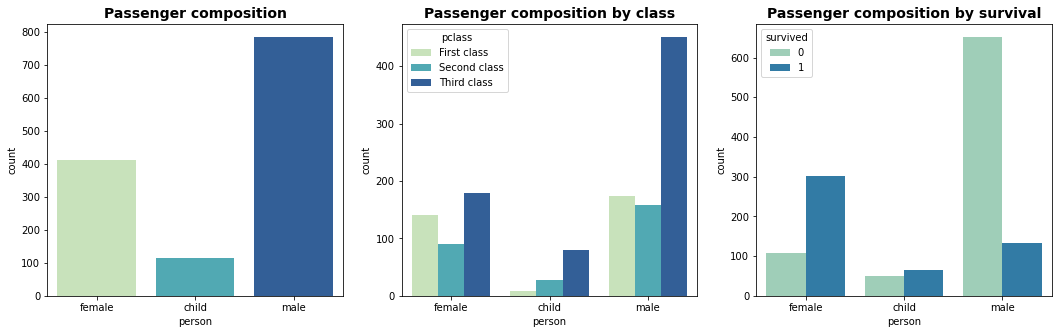

In [89]:
# Charting whether adult or child
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], data=graph_df, x='person', palette=palette).set_title("Passenger composition", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1], data=graph_df, x='person', hue='pclass',  palette=palette).set_title("Passenger composition by class", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2], data=graph_df, x='person', hue='survived',  palette=palette).set_title("Passenger composition by survival", fontsize=14, fontweight='bold')

<h7> Defining adult or child

In [90]:
# Defining if adult or child
def adult_with_child(passenger):
    person, parch = passenger

    if person == 'male' and parch > 0:
        return 'male_with_child'
    elif person == 'male' and parch == 0:
        return 'male_no_children'
    elif person == 'female' and parch > 0:
        return 'female_with_child'
    elif person == 'female' and parch == 0:
        return 'female_no_children'
    elif person == 'child':
        return person
    else:
        return 'person'

In [91]:
# Applying the function
graph_df['with_child'] = graph_df[['person', 'parch']].apply(adult_with_child, axis=1)
graph_df['with_child'].value_counts(dropna=False)

male_no_children      705
female_no_children    283
female_with_child     127
child                 115
male_with_child        79
Name: with_child, dtype: int64

Text(0.5, 1.0, 'Passenger composition by survival')

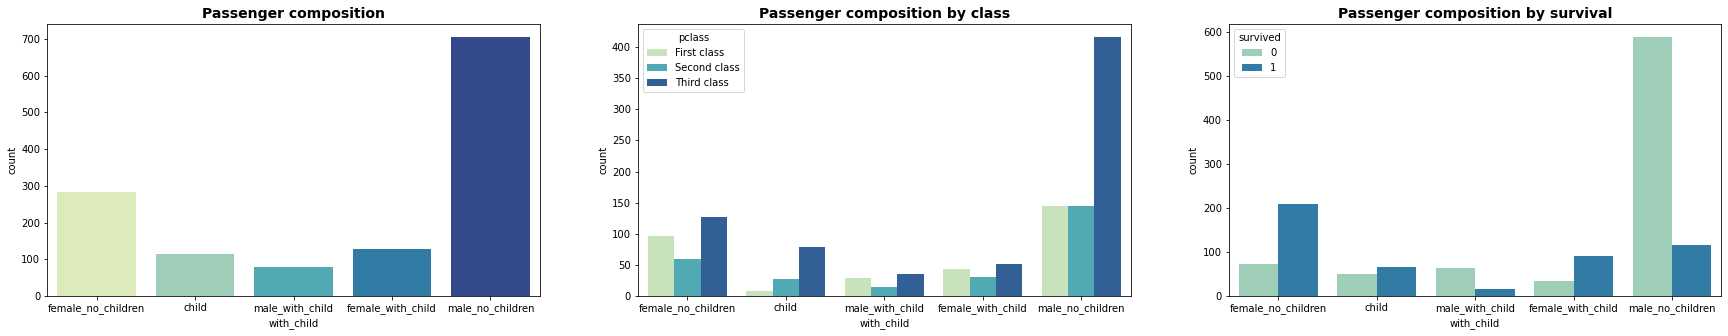

In [92]:
# Charting whether adult or child
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
sns.countplot(ax=axes[0], data=graph_df, x='with_child', palette=palette).set_title("Passenger composition", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1], data=graph_df, x='with_child', hue='pclass',  palette=palette).set_title("Passenger composition by class", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2], data=graph_df, x='with_child', hue='survived',  palette=palette).set_title("Passenger composition by survival", fontsize=14, fontweight='bold')

## Summary of survival

Text(0.5, 1.0, 'Embarked')

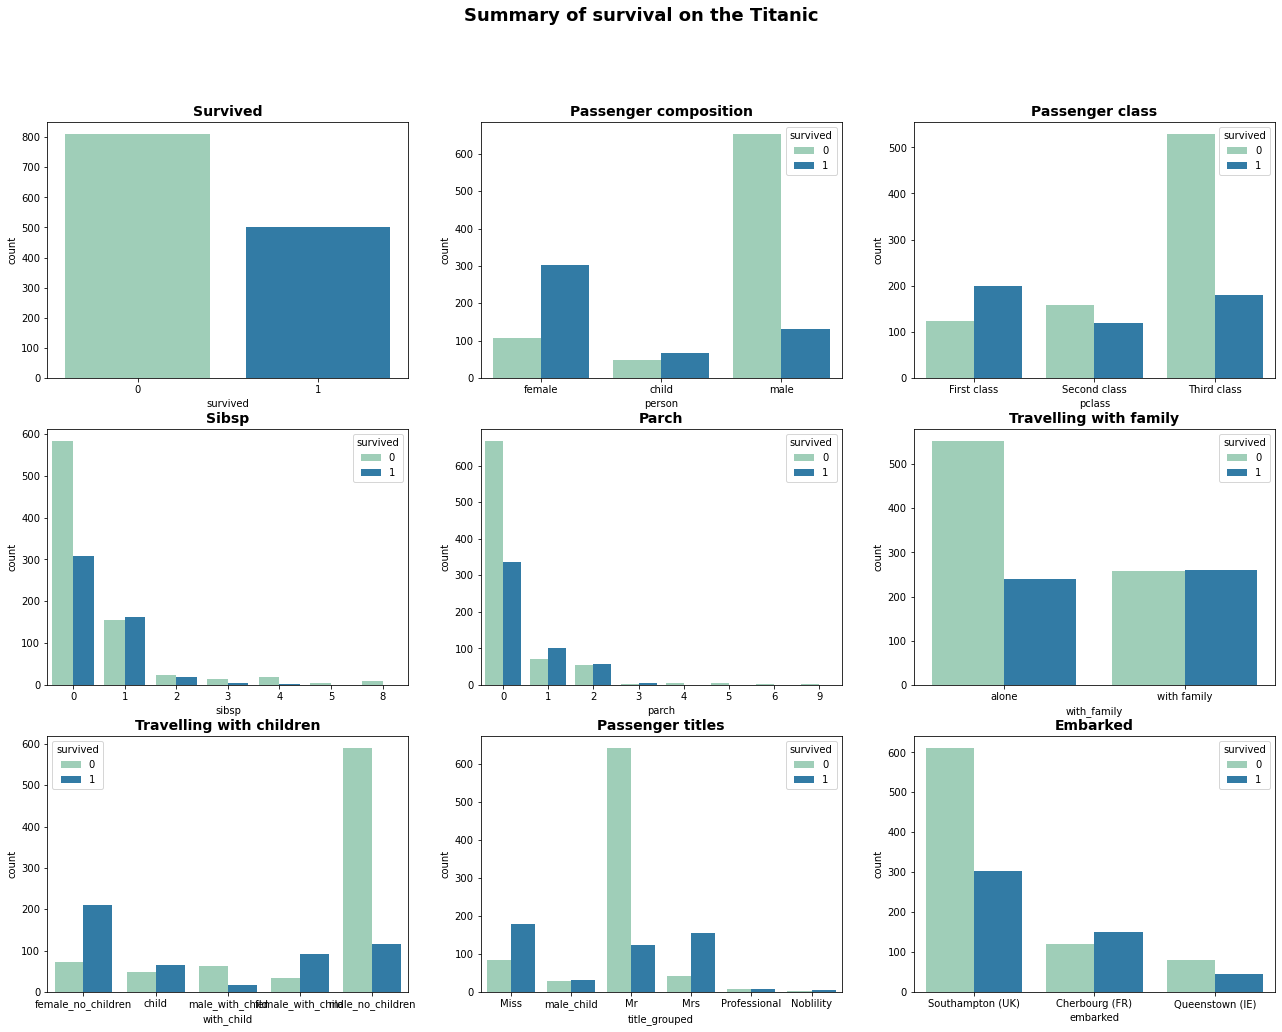

In [93]:
# Charting the data of survival

fig, axes = plt.subplots(3, 3, figsize=(22, 16))

fig.suptitle('Summary of survival on the Titanic', fontsize=18, fontweight='bold')

sns.countplot(ax=axes[0, 0], data=graph_df, x='survived', palette=palette).set_title("Survived", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[0, 1], data=graph_df, x='person', hue='survived',  palette=palette).set_title("Passenger composition", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[0, 2], data=graph_df, x='pclass', hue='survived',  palette=palette).set_title("Passenger class", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1, 0], data=graph_df, x='sibsp', hue='survived',  palette=palette).set_title("Sibsp", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1, 1], data=graph_df, x='parch', hue='survived',  palette=palette).set_title("Parch", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[1, 2], data=graph_df, x='with_family', hue='survived',  palette=palette).set_title("Travelling with family", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2, 0], data=graph_df, x='with_child', hue='survived',  palette=palette).set_title("Travelling with children", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2, 1], data=graph_df, x='title_grouped', hue='survived',  palette=palette).set_title("Passenger titles", fontsize=14, fontweight='bold')
sns.countplot(ax=axes[2, 2], data=graph_df, x='embarked', hue='survived',  palette=palette).set_title("Embarked", fontsize=14, fontweight='bold')



# Cleaning the data

In [94]:
# Looking at the amount of missing data
print(titanic_df.isna().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


### Age - updating null values

In [95]:
# Looking at average age grouped by sex and pclass
grouped = titanic_df.groupby(['pclass'])
grouped['age'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,284.0,39.159918,14.548059,0.9167,28.0,39.0,50.0,80.0
2,261.0,29.506705,13.638628,0.6667,22.0,29.0,36.0,70.0
3,501.0,24.816367,11.958202,0.1667,18.0,24.0,32.0,74.0


In [96]:
# Looking at average age grouped by sex and pclass
grouped = titanic_df.groupby(['pclass', 'sex'])
grouped['age'].describe()

count       mean        std     min   25%   50%    75%   max
pclass sex                                                                 
1      female  133.0  37.037594  14.272460  2.0000  24.0  36.0  48.00  76.0
       male    151.0  41.029250  14.578590  0.9167  30.0  42.0  50.00  80.0
2      female  103.0  27.499191  12.911813  0.9167  20.0  28.0  34.00  60.0
       male    158.0  30.815401  13.977355  0.6667  23.0  29.5  38.75  70.0
3      female  152.0  22.185307  12.205294  0.1667  16.0  22.0  30.00  63.0
       male    349.0  25.962273  11.682395  0.3333  20.0  25.0  32.00  74.0

In [97]:
# Creating function to code null age values based on the average age associated with passenger sex and pclass
def recode_age_nulls(cols):
    age = cols[0]
    pclass = cols[1]
    sex = cols[2]
  
    if pd.isnull(age):
        if pclass == 1 and sex == 'female':
            return 37
        elif pclass == 1 and sex == 'male':
            return 41
        elif pclass == 2 and sex == 'female':
            return 27
        elif pclass == 2 and sex == 'male':
            return 30
        elif pclass == 3 and sex == 'female':
            return 22
        else:
            return 25
    else:
        return age   

In [98]:
# Applying the age function and checking dataframe
titanic_df['age_updated'] = titanic_df[['age', 'pclass', 'sex']].apply(recode_age_nulls, axis=1)
titanic_df[titanic_df.age.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",41.0
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA",41.0
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",41.0
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN,41.0
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY",37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN,25.0
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN,25.0
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN,25.0
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN,25.0


### embarked - missing data

In [99]:
# Looking at values for embarked
titanic_df['embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [100]:
# identifying the two rows with missing values
titanic_df[titanic_df.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,38.0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",62.0


Online research found that both passengers with missing embarked data embarked at Southampton
 - https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
 - https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [101]:
# Updating the two missing values

# Creating a copy of the embarked column to append new data to
titanic_df['embarked_updated'] = titanic_df['embarked'].copy()

# Updating missing values for embarked based off the above research
titanic_df.at[168, 'embarked_updated'] = 'S'
titanic_df.at[284, 'embarked_updated'] = 'S'

# Checking change occured
titanic_df.loc[(titanic_df['name'] == 'Icard, Miss. Amelie' ) |
               (titanic_df['name'] == 'Stone, Mrs. George Nelson (Martha Evelyn)'), :]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,38.0,S
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",62.0,S


In [102]:
# Calling the function and saving it to a new column
titanic_df['embarked_updated'] = titanic_df['embarked_updated'].apply(embarked_name)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,Southampton (UK)
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,Southampton (UK)
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,Southampton (UK)
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,Southampton (UK)
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,Southampton (UK)


### fare - missing data

In [103]:
# identifying the passenger with who is missing a value for fare
titanic_df[titanic_df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,60.5,Southampton (UK)


In [104]:
# finding out the average fare by sex and class
grouped = titanic_df.groupby(['pclass', 'sex'])
grouped['fare'].describe()

count        mean        std    min      25%       50%  \
pclass sex                                                              
1      female  144.0  109.412385  82.885854  25.70  55.4417  80.92915   
       male    179.0   69.888385  74.079427   0.00  27.7208  49.50420   
2      female  106.0   23.234827  11.239817  10.50  13.0000  23.00000   
       male    171.0   19.904946  14.775149   0.00  12.3500  13.00000   
3      female  216.0   15.324250  11.786512   6.75   7.7750  10.48960   
       male    492.0   12.415462  11.261638   0.00   7.7500   7.89580   

                      75%       max  
pclass sex                           
1      female  135.919775  512.3292  
       male     79.200000  512.3292  
2      female   26.250000   65.0000  
       male     26.000000   73.5000  
3      female   17.850000   69.5500  
       male      9.586450   69.5500

In [105]:
# Updating the missing value

# creating a copy of the fare column to append new data to
titanic_df['fare_updated'] = titanic_df['fare'].copy()

# updating missing values for Storey,Mr.Thomas based on the average value for a male travelling in thrid class
titanic_df.at[1225, 'fare_updated'] = 12.4155

# checking change occured
titanic_df.loc[titanic_df['name'] == 'Storey, Mr. Thomas', :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated,fare_updated
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,60.5,Southampton (UK),12.4155


### Cabin

In [106]:
# Checking the number of missing values
titanic_df['cabin'].value_counts(dropna=False)

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
C118                  1
B10                   1
C91                   1
A11                   1
C95                   1
Name: cabin, Length: 187, dtype: int64

In [107]:
# Obtaining the deck number by taking the letter from the cabin number
titanic_df['deck'] = titanic_df['cabin'].str.slice(0,1) # taking the first character

# Filling in the missing values for deck with 'Unknown'
titanic_df['deck'] = titanic_df['deck'].fillna("Unknown")
print(titanic_df['deck'].value_counts(dropna=False))

# Checking the dataframe
titanic_df.head()

Unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: deck, dtype: int64


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated,fare_updated,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,Southampton (UK),211.3375,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,Southampton (UK),151.5500,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,Southampton (UK),151.5500,C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,Southampton (UK),151.5500,C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,Southampton (UK),151.5500,C


### Updaging pclass names

In [108]:
# Calling the function and saving it to a new column
titanic_df['pclass_updated'] = titanic_df['pclass'].apply(pclass_name)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated,fare_updated,deck,pclass_updated
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,Southampton (UK),211.3375,B,First class
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,Southampton (UK),151.5500,C,First class
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,Southampton (UK),151.5500,C,First class
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,Southampton (UK),151.5500,C,First class
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,Southampton (UK),151.5500,C,First class


### Home.dest

In [109]:
# Checking the number of missing values
titanic_df['home.dest'].value_counts(dropna=False)

NaN                     564
New York, NY             64
London                   14
Montreal, PQ             10
Cornwall / Akron, OH      9
                       ... 
West Hoboken, NJ          1
Copenhagen, Denmark       1
Holley, NY                1
Devonport, England        1
Roachdale, IN             1
Name: home.dest, Length: 370, dtype: int64

In [110]:
# Creating a copy of the field
titanic_df['home_dest_updated'] = titanic_df['home.dest'].copy()

# Filling the missing values with 'Unknown'
titanic_df['home_dest_updated'] = titanic_df['home_dest_updated'].fillna("Unknown")
print(titanic_df['home_dest_updated'].value_counts(dropna=False))

Unknown                             564
New York, NY                         64
London                               14
Montreal, PQ                         10
Paris, France                         9
                                   ... 
New Britain, CT                       1
London / Middlesex                    1
Glasgow / Bangor, ME                  1
Belgium  Montreal, PQ                 1
Ascot, Berkshire / Rochester, NY      1
Name: home_dest_updated, Length: 370, dtype: int64


### Creating a unique id for each passenger

In [111]:
# creating a unique id for each passenger using the index
titanic_df['passenger_id'] = np.arange(1, len(titanic_df) + 1)
titanic_df = titanic_df.set_index('passenger_id')
titanic_df.reset_index(inplace=True)
titanic_df.head()

,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,...,embarked,boat,body,home.dest,age_updated,embarked_updated,fare_updated,deck,pclass_updated,home_dest_updated
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,...,S,2,NaN,"St Louis, MO",29.0000,Southampton (UK),211.3375,B,First class,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,...,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,Southampton (UK),151.5500,C,First class,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,...,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,Southampton (UK),151.5500,C,First class,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,...,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,Southampton (UK),151.5500,C,First class,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,...,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,Southampton (UK),151.5500,C,First class,"Montreal, PQ / Chesterville, ON"


### Extracting titles

In [112]:
# Extracting titles from passenger name and assigning them to a new column
name_split = titanic_df['name'].str.split(',', expand=True)[1] # splitting name in two based on the ',' and taking the second column which contains the title
title = name_split.str.split('.', expand=True)[0] # splitting name in two based on the full stop and taking the first column that contains only the title
title = title.str.strip() # removing the additional space at the start of the title
titanic_df['title'] = title # adding title as a new column in the data frame
titanic_df['title'].value_counts(dropna=False)

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Sir               1
Jonkheer          1
Capt              1
Mme               1
Dona              1
Don               1
Lady              1
the Countess      1
Name: title, dtype: int64

In [113]:
# Calling that function and assigning results to new column in dataframe
titanic_df['title_grouped'] = titanic_df['title'].apply(title_grouped)

### Applying additional functions to the titanic data set

In [114]:
# Applying the function that notes whether they are a male / female / child
titanic_df['person'] = titanic_df[['age', 'sex']].apply(male_female_child, axis=1)

In [115]:
# Applying the function that notes whether they are travelling with a child
titanic_df['with_child'] = titanic_df[['person', 'parch']].apply(adult_with_child, axis=1)

In [116]:
# Creating a new column that sums together the number of family members they were travelling with
titanic_df['family_members'] = titanic_df['sibsp'] + titanic_df['parch']

# Calling the family_members function
titanic_df['with_family'] = titanic_df['family_members'].apply(family_members)

### checking for any further missing values

In [117]:
# checking missing values
titanic_df.isna().sum()

passenger_id            0
pclass                  0
survived                0
name                    0
sex                     0
age                   263
sibsp                   0
parch                   0
ticket                  0
fare                    1
cabin                1014
embarked                2
boat                  823
body                 1188
home.dest             564
age_updated             0
embarked_updated        0
fare_updated            0
deck                    0
pclass_updated          0
home_dest_updated       0
title                   0
title_grouped           0
person                  0
with_child              0
family_members          0
with_family             0
dtype: int64

In [118]:
titanic_df.columns

Index(['passenger_id', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'age_updated', 'embarked_updated', 'fare_updated', 'deck',
       'pclass_updated', 'home_dest_updated', 'title', 'title_grouped',
       'person', 'with_child', 'family_members', 'with_family'],
      dtype='object')

### Saving to csv file

In [122]:
# Save full data file to a csv
titanic_df.to_csv('data_files/titanic_full_data.csv', index=False, mode='w')

In [123]:
# Saving passenger information into a csv to load into sql

# Creating a dataframe with just the passenger information fields
titanic_passenger_info_df = titanic_df[['passenger_id', 'pclass_updated', 'name', 'sex', 'age_updated', 'sibsp', 'parch', 'ticket', 'fare_updated', 'cabin', 'embarked_updated', 'home_dest_updated', 'deck']].copy()
titanic_passenger_info_df.head()

# Save to a csv
titanic_passenger_info_df.to_csv('data_files/titanic_passenger_info.csv', index=False, mode='w')

In [124]:
# Saving passenger survival information into a csv to load into sql

# Creating a dataframe with just the survival information fields
titanic_survival_info_df = titanic_df[['passenger_id', 'survived', 'boat', 'body']].copy()
titanic_survival_info_df.head()

# Save to a csv
titanic_survival_info_df.to_csv('data_files/titanic_survival_info.csv', index=False, mode='w')